In [ ]:
pip install pandas scikit-learn matplotlib seaborn


Intercept (β₀): 2.717542187568766
Coefficient (β₁): -0.7853329851857456

Accuracy: 0.64

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.72      0.72       126
           1       0.51      0.50      0.51        74

    accuracy                           0.64       200
   macro avg       0.61      0.61      0.61       200
weighted avg       0.64      0.64      0.64       200



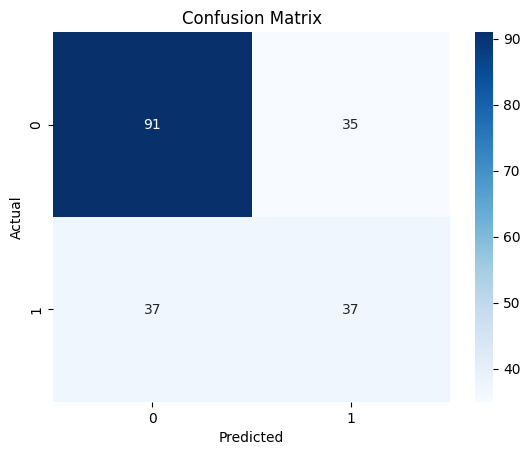

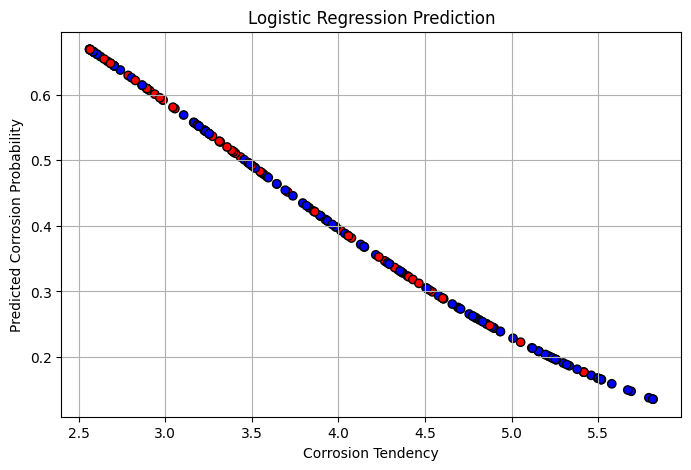

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# STEP 1: Load the dataset
df = pd.read_csv("synthetic_data11.csv")  # Use your file path

# STEP 2: Feature Engineering - Corrosion Tendency
df['Corrosion_Tendency'] = (
    0.02 * df['H2S_concentration'] +
    0.5 * df['CO2_concentration'] +
    0.01 * df['Water_cut'] +
    0.03 * df['Pipe_age'] +
    0.005 * (df['Pressure cycles'] / 1000) +
    0.02 * df['Temperature ©']
)

# STEP 3: Prepare features and binary target
X = df[['Corrosion_Tendency']]
y = (df['Corrosion Probability'] > 0.5).astype(int)  # Convert to binary classification

# STEP 4: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# STEP 5: Train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# STEP 6: Make predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# STEP 7: Print model coefficients
print("Intercept (β₀):", model.intercept_[0])
print("Coefficient (β₁):", model.coef_[0][0])

# STEP 8: Evaluate model
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# STEP 9: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# STEP 10: Plot predicted probabilities
plt.figure(figsize=(8,5))
plt.scatter(X_test, y_prob, c=y_test, cmap='bwr', edgecolors='k')
plt.xlabel("Corrosion Tendency")
plt.ylabel("Predicted Corrosion Probability")
plt.title("Logistic Regression Prediction")
plt.grid(True)
plt.show()


In [ ]:
y_prob

array([0.66482098, 0.66471248, 0.49666618, 0.66858337, 0.20855641,
       0.5565657 , 0.17224733, 0.64399839, 0.54026779, 0.34556088,
       0.51426059, 0.51278819, 0.24410088, 0.60623571, 0.25947504,
       0.42771155, 0.47894871, 0.60899466, 0.27581273, 0.3281713 ,
       0.64426842, 0.2566984 , 0.42270675, 0.46377908, 0.59190041,
       0.13807847, 0.66520412, 0.66924168, 0.40913266, 0.60923774,
       0.41515086, 0.49272329, 0.3717261 , 0.50495222, 0.18684676,
       0.16815914, 0.49042979, 0.39297226, 0.32379544, 0.19656141,
       0.16580616, 0.65811303, 0.32229441, 0.47527226, 0.21406764,
       0.54614491, 0.38847416, 0.33305591, 0.60075411, 0.22871485,
       0.2013467 , 0.17704857, 0.66846851, 0.34666728, 0.62932674,
       0.43476034, 0.54091629, 0.5126636 , 0.33028368, 0.30552906,
       0.25071809, 0.50084999, 0.6144841 , 0.42150562, 0.3983522 ,
       0.45171637, 0.55779321, 0.34146543, 0.52886505, 0.1910377 ,
       0.26565835, 0.66169534, 0.48151567, 0.20893063, 0.39846

In [ ]:
import joblib

# Save your trained logistic regression model
joblib.dump(model, 'logistic_regression_corrosion_model.pkl')



['logistic_regression_corrosion_model.pkl']

In [ ]:
import pickle

# Save the predicted probabilities
with open("y_probabilities.pkl", "wb") as file:
    pickle.dump(y_prob, file)

print("Predicted probabilities saved to y_probabilities.pkl")


Predicted probabilities saved to y_probabilities.pkl


In [ ]:
y_pred

array([1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1])